In [1]:
import ROOT
import numpy as np
import pandas as pd
import time
import printColor as pc
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from celluloid import Camera
from moviepy.editor import *
from matplotlib import gridspec
import scipy.stats as stats


color = pc.bcolors()

ROOT.ROOT.EnableImplicitMT()

def importROOT(filename):
	f = ROOT.TFile.Open(filename, "read")
	Hit = f.Get("Hit")
	dataTrack, columnsTrack = Hit.AsMatrix(return_labels=True)
	track = pd.DataFrame(data=dataTrack, columns=columnsTrack)
	#print(track)
	return(track)

track = importROOT("~/data/g2wd10k_1.root")
eID = track['eventID']
eID = eID.drop_duplicates()
eIDNum = len(eID)

print(len(track))
eIDNum = range(eIDNum)
timeWinTotal = 60e-6 # s
binNum = 5e-9 # s
timeWinNum = int(timeWinTotal / binNum)



print(timeWinNum)
timeNum = range(timeWinNum)
dfMuonPos = pd.DataFrame([])
BinRange = range(timeWinNum)
for j in timeNum:
    dfMuonPosTemp = track[(track['hitTime'] >= j*5e-3) & (track['hitTime'] < j*5e-3+5e-3)] 
    dfMuonPosTemp['timeBin'] = j
    if (j % 1000 ==0):
        print(j)
    dfMuonPosTemp = dfMuonPosTemp[['eventID', 'hitTime' , 'hitPosX', 'hitPosY' ,'hitPosZ','hitPMag','hitR','eDep','hitAngle','VolID','timeBin']]
    dfMuonPos = pd.concat([dfMuonPos, dfMuonPosTemp])
#print(dfMuonPos)

Welcome to JupyROOT 6.19/01
 start : color class is imported.. 
290625
12000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


        eventID    hitTime     hitPosX     hitPosY     hitPosZ     hitPMag  \
35705    1224.0  25.000876  -17.788448  105.919388  -94.786565  195.947322   
83865    2864.0  25.004342   68.874812  215.210943   15.631893   88.986563   
85749    2928.0  25.000861  193.705740  -99.820330 -433.953904   64.754271   
105035   3604.0  25.004731 -207.662467  104.686986  -85.785783  271.162156   
118111   4083.0  25.003298 -149.566597   75.085662  274.856871  145.101402   
140194   4860.0  25.001836   97.678529 -132.741659 -143.730816  159.358598   
175589   6078.0  25.002098  -29.969754   95.473485   90.540479  165.274475   
239943   8252.0  25.004015  -71.555287  216.988461  233.634178  189.628742   
273990   9470.0  25.004333 -202.870952   31.119137   30.288731  120.327547   
289804   9971.0  25.002493   -1.000000  118.214353 -309.519853  183.114513   
2745       87.0  25.008876   35.950612 -220.590780 -340.522292  194.286804   
38497    1309.0  25.007020  145.991304  199.238490 -113.339165  

[0.000e+00 1.000e+00 2.000e+00 ... 9.998e+03 9.999e+03 1.000e+04]
[0. 0. 0. ... 0. 0. 0.]
Empty DataFrame
Columns: [eventID, hitTime, hitPosX, hitPosY, hitPosZ, hitPMag, hitR, eDep, hitAngle, VolID, timeBin]
Index: []
[0.000e+00 1.000e+00 2.000e+00 ... 9.998e+03 9.999e+03 1.000e+04]
[0. 0. 0. ... 0. 0. 0.]
7238
        eventID    hitTime     hitPosX   hitPosY     hitPosZ     hitPMag  \
208904   7238.0  25.013293  115.866623 -1.000000 -465.439447  185.794475   
208905   7238.0  25.013333  115.860053 -0.990274 -465.438514  185.794475   

              hitR          eDep   hitAngle  VolID  timeBin  
208904  115.870938  2.125662e-24  76.020948    0.0     5002  
208905  115.864284  3.316914e-03  76.021682    0.0     5002  
[0.000e+00 1.000e+00 2.000e+00 ... 9.998e+03 9.999e+03 1.000e+04]
[0. 0. 0. ... 0. 0. 0.]
Empty DataFrame
Columns: [eventID, hitTime, hitPosX, hitPosY, hitPosZ, hitPMag, hitR, eDep, hitAngle, VolID, timeBin]
Index: []


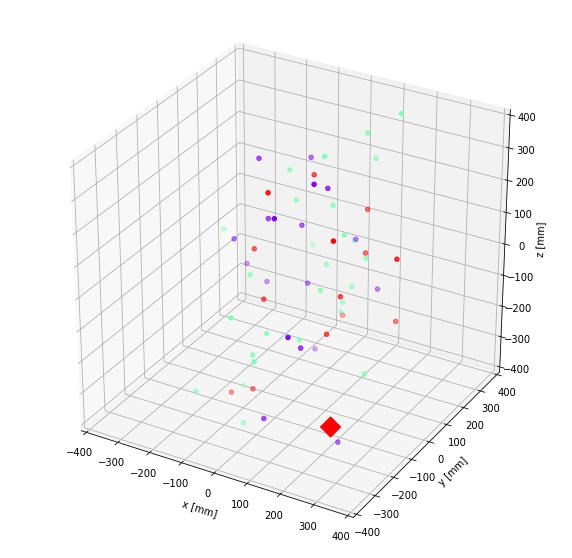

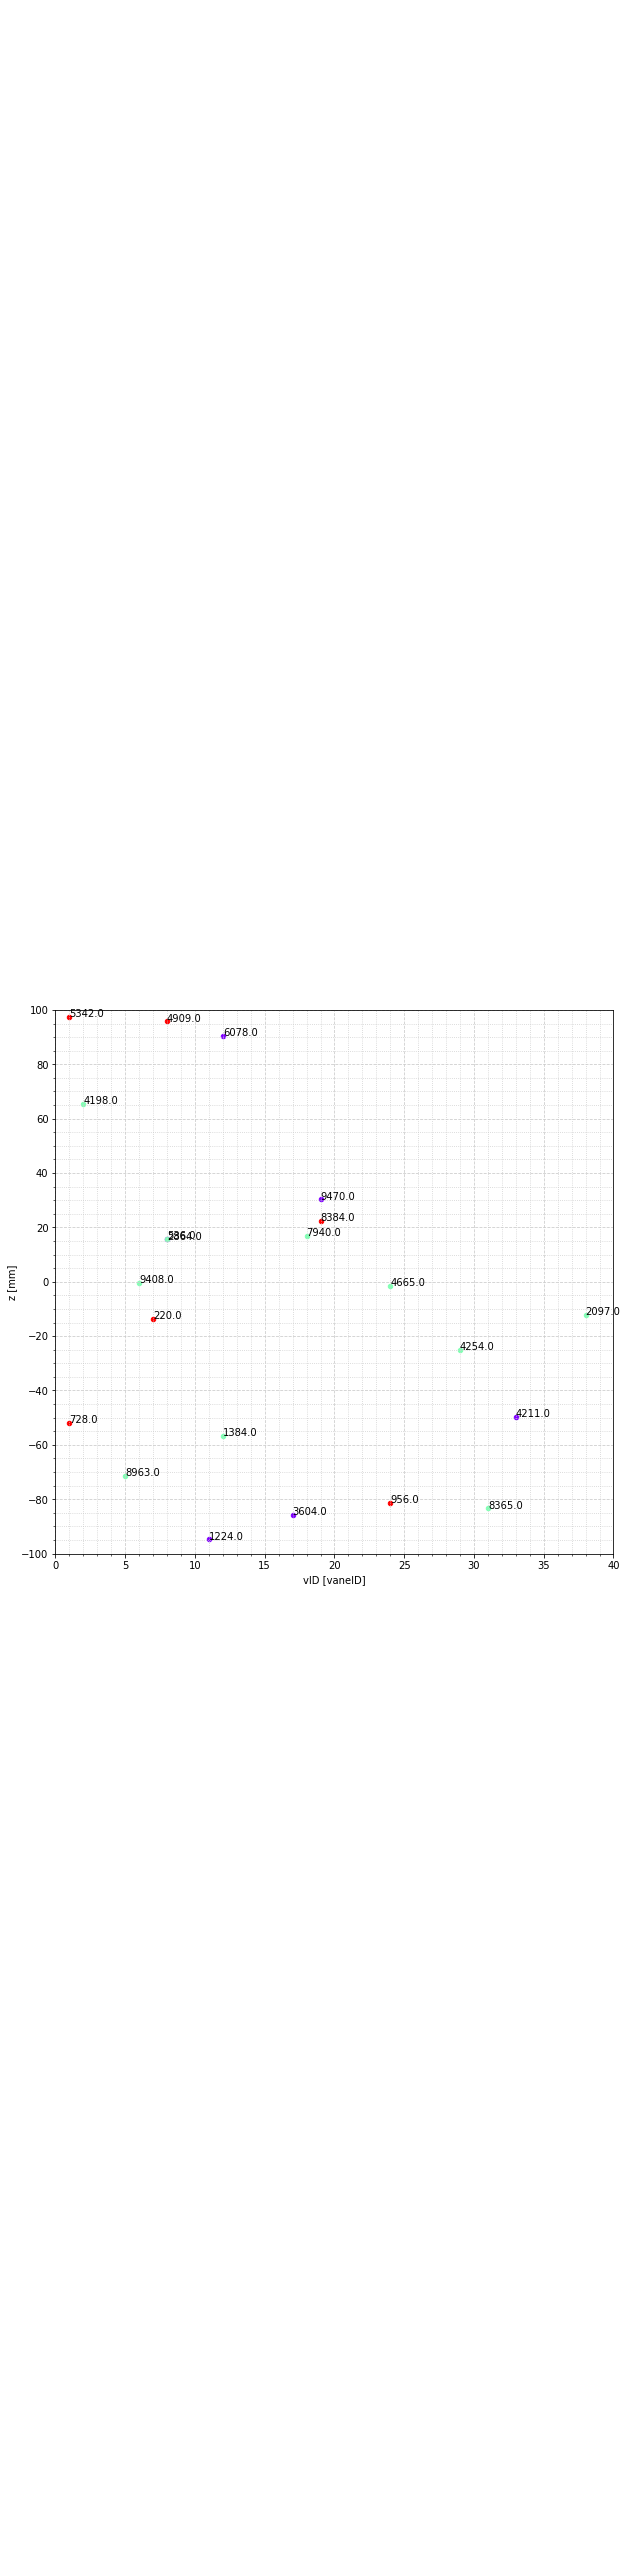

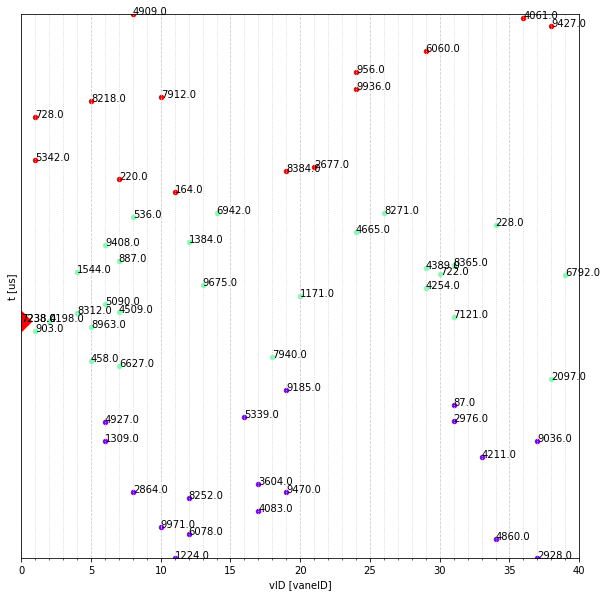

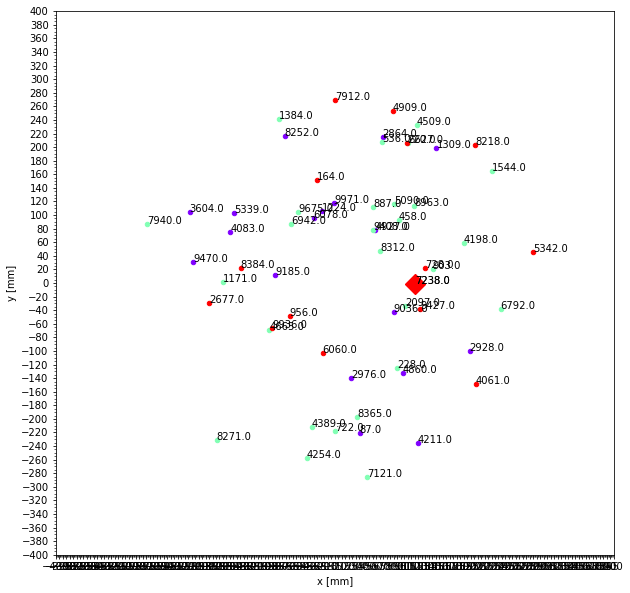

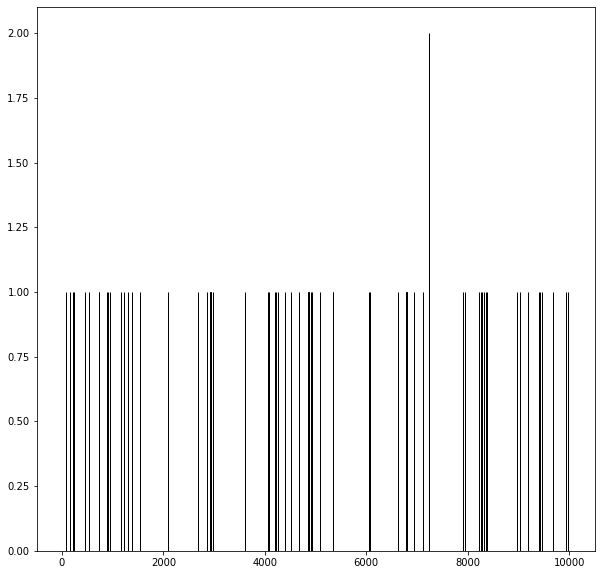

In [2]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
winGap =  2
winMin1 = 5000
winMax1 = winMin1+winGap

winMin2 = winMax1
winMax2 = winMin2+winGap

winMin3 = winMax2
winMax3 = winMin3+winGap

import itertools
testPlot1 = dfMuonPos[(dfMuonPos["timeBin"] >= winMin1) & (dfMuonPos["timeBin"] < winMax1)]
testPlot2 = dfMuonPos[(dfMuonPos["timeBin"] >= winMin2) & (dfMuonPos["timeBin"] < winMax2)]
testPlot3 = dfMuonPos[(dfMuonPos["timeBin"] >= winMin3) & (dfMuonPos["timeBin"] < winMax3)]

testPlotSum = pd.concat([testPlot1, testPlot2, testPlot3])

print(testPlot1)
print(testPlot2)
print(testPlot3)

eveID1 = testPlot1["eventID"]
eveID2 = testPlot2["eventID"]
eveID3 = testPlot3["eventID"]

fig1 = plt.figure(1, figsize =(10 , 10))
fig2 = plt.figure(2, figsize =(10 , 10))
fig3 = plt.figure(3, figsize =(10 , 10))
fig4 = plt.figure(4, figsize =(10 , 10))
fig5 = plt.figure(5, figsize =(10 , 10))
pos3D = fig1.add_subplot(111, projection='3d')
pos2DVZ = fig2.add_subplot()
pos2DVT = fig3.add_subplot()
pos2DXY = fig4.add_subplot()
hist = fig5.add_subplot()

pos3D.set_xlabel('x [mm]')
pos3D.set_ylabel('y [mm]')
pos3D.set_zlabel('z [mm]')
pos3D.set_xlim( -400,400)
pos3D.set_ylim( -400,400)
pos3D.set_zlim(-400,400)

pos2DVZ.set_xlabel('vID [vaneID]')
pos2DVZ.set_ylabel('z [mm]')
pos2DVZ.set_xlim(0,40)
pos2DVZ.set_ylim(-100,100)
pos2DVZ.xaxis.set_major_locator(MultipleLocator(5))
pos2DVZ.yaxis.set_major_locator(MultipleLocator(20))
# Change minor ticks to show every 5. (20/4 = 5)
pos2DVZ.xaxis.set_minor_locator(AutoMinorLocator(5))
pos2DVZ.yaxis.set_minor_locator(AutoMinorLocator(4))

timeMin = testPlotSum["hitTime"].min()
timeMax = testPlotSum["hitTime"].max()

pos2DVT.set_xlabel('vID [vaneID]')
pos2DVT.set_ylabel('t [us]')
pos2DVT.set_xlim(0,40)
pos2DVT.set_ylim(timeMin,timeMax)
pos2DVT.xaxis.set_major_locator(MultipleLocator(5))
pos2DVT.yaxis.set_major_locator(MultipleLocator(20))
# Change minor ticks to show every 5. (20/4 = 5)
pos2DVT.xaxis.set_minor_locator(AutoMinorLocator(5))
pos2DVT.yaxis.set_minor_locator(AutoMinorLocator(4))

pos2DXY.set_xlabel('x [mm]')
pos2DXY.set_ylabel('y [mm]')
pos2DXY.set_xlim(-400,400)
pos2DXY.set_ylim(-400,400)
pos2DXY.xaxis.set_major_locator(MultipleLocator(5))
pos2DXY.yaxis.set_major_locator(MultipleLocator(20))
# Change minor ticks to show every 5. (20/4 = 5)
pos2DXY.xaxis.set_minor_locator(AutoMinorLocator(5))
pos2DXY.yaxis.set_minor_locator(AutoMinorLocator(4))
pos2DVZ.grid(which='major', color='#CCCCCC', linestyle='--')
pos2DVZ.grid(which='minor', color='#CCCCCC', linestyle=':')
pos2DVT.grid(which='major', color='#CCCCCC', linestyle='--')
pos2DVT.grid(which='minor', color='#CCCCCC', linestyle=':')

sample_size = 100
x = np.vstack([
    np.random.normal(0, 1, sample_size).reshape(sample_size//2, 2), 
    np.random.normal(2, 1, sample_size).reshape(sample_size//2, 2), 
    np.random.normal(4, 1, sample_size).reshape(sample_size//2, 2)
])
y = np.array(list(itertools.chain.from_iterable([ [i+1 for j in range(0, sample_size//2)] for i in range(0, 3)])))
y = y.reshape(-1, 1)
df = pd.DataFrame(np.hstack([x, y]), columns=['x1', 'x2', 'y'])
c_lst = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, len(set(df['y'])))]


def plotting(data, eveID, i):
    pos3D.scatter(data["hitPosX"],data["hitPosY"],data["hitPosZ"], color=c_lst[i],s= 20)
    pos2DXY.scatter(data["hitPosX"],data["hitPosY"], color=c_lst[i],s= 20)
    pos2DVZ.scatter(data["VolID"],data["hitPosZ"], color=c_lst[i],s= 20)
    pos2DVT.scatter(data["VolID"],data["hitTime"], color=c_lst[i],s= 20)
    eveID = eveID.values
    hitTimes = data["hitTime"].values
    volIDs = data["VolID"].values
    zS = data["hitPosZ"].values
    yS = data["hitPosY"].values
    xS = data["hitPosX"].values
    hist = plt.hist(eveID, bins = 10000, range =(0,10000), edgecolor = 'black')
    yHist, xHist, patches = hist
    #yHist = pd.DataFrame(yHist)
    print(xHist)
    print(yHist)
    eveSel = []
    for i, j in zip(yHist, xHist):
        if(i >= 2):
            print(int(j))
            eveSel.append(int(j))
    dfSel = data[data['eventID'].isin(eveSel)]
    print(dfSel)
    return dfSel, eveSel, xS, yS, zS,volIDs, hitTimes 


dfSel1, eveSel1, xS1, yS1, zS1, volIDs1, hitTimes1 = plotting(testPlot1, eveID1, 0)
dfSel2, eveSel2, xS2, yS2, zS2, volIDs2, hitTimes2 = plotting(testPlot2, eveID2, 1)
dfSel3, eveSel3, xS3, yS3, zS3, volIDs3, hitTimes3 = plotting(testPlot3, eveID3, 2)

#print('dfSel11')
#print(dfSel11)
#print('dfSel12')
#print(dfSel12)
#print('dfSel13')
#print(dfSel13)
    
    
#xHist = pd.DataFrame(np.arange(0,10000))
#dfHist = pd.concat([xHist, yHist], axis=1)
#dfHist.columns=['eveID', 'hitNumber']
#dfHistTest = dfHist[dfHist.hitNumber == 4]
#print(dfHist)
#print(dfHistTest)

def trackLabel(eveID, xS, yS, zS ,volIDs, hitTimes):
    for i, j in enumerate(eveID):
        track = str(j)
        pos2DXY.annotate(track, xy=(xS[i], yS[i]))
    for i, j in enumerate(eveID):
        track = str(j)
        pos2DVT.annotate(track, xy=(volIDs[i], hitTimes[i]))
    for i, j in enumerate(eveID):
        track = str(j)
        pos2DVZ.annotate(track, xy=(volIDs[i], zS[i]))
    
trackLabel(eveID1, xS1, yS1, zS1, volIDs1, hitTimes1)        
trackLabel(eveID2, xS2, yS2, zS2, volIDs2, hitTimes2)        
trackLabel(eveID3, xS3, yS3, zS3, volIDs3, hitTimes3) 



def plotSel(dfSel):
    pos3D.scatter(dfSel["hitPosX"],dfSel["hitPosY"],dfSel["hitPosZ"], c='r', marker = 'D', s= 200)
    pos2DXY.scatter(dfSel["hitPosX"],dfSel["hitPosY"], c='r', marker = 'D', s= 200)
    pos2DVZ.scatter(dfSel["VolID"],dfSel["hitPosZ"], c='r', marker = 'D', s= 200)
    pos2DVT.scatter(dfSel["VolID"],dfSel["hitTime"], c='r', marker = 'D', s= 200)

plotSel(dfSel1)
plotSel(dfSel2)
plotSel(dfSel3)

plt.show()